# Solving DST-II non-linear system of equations

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pywt, math
from dst.filters import get_q_filter_equations,get_filters, system_function
import matplotlib.pyplot as plt
import numpy as np
from dst.filters import compute_abs_error
import matplotlib

## First approaches to solve the non-linear system

## Pattern 1

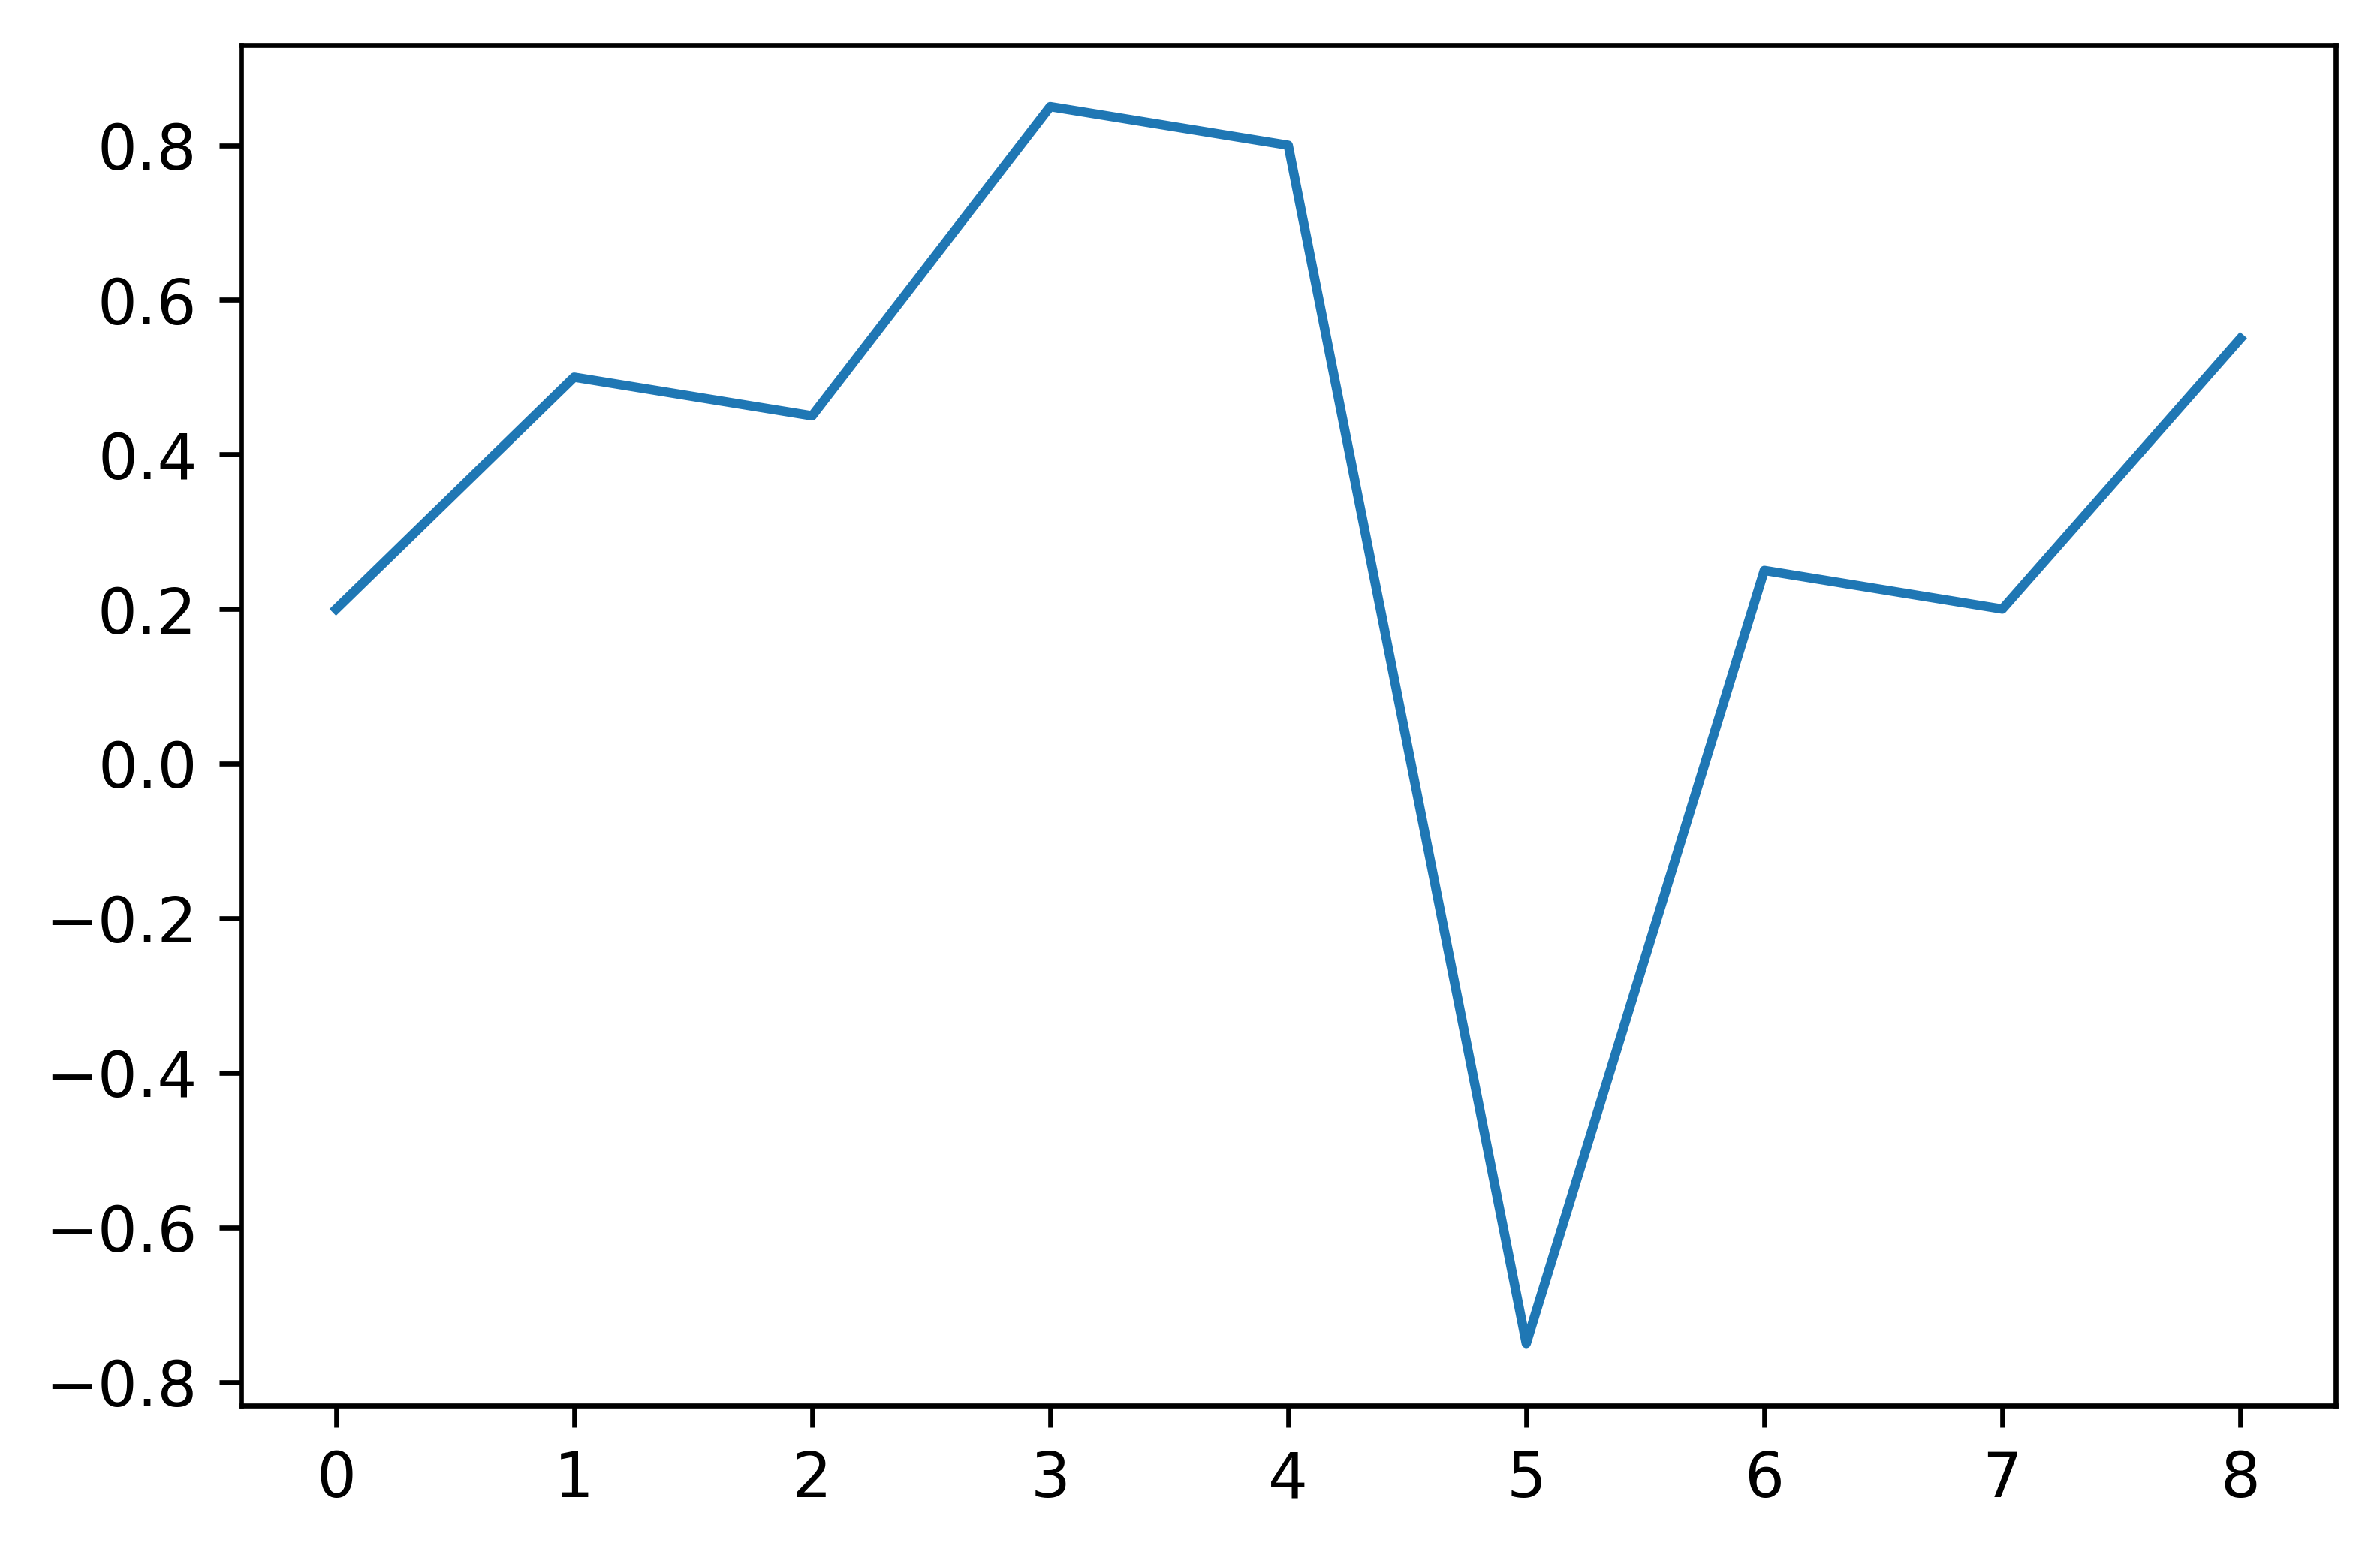

In [3]:
pattern = np.array([0.20, 0.50, 0.45, 0.85, 0.80, -0.75, 0.25, 0.20, 0.55])
matplotlib.pyplot.figure(dpi=600)
plt.plot(np.arange(0,len(pattern),1),pattern)
plt.show() 

In [4]:
q_symbols, equations = get_q_filter_equations(pattern, verbose=True)
fun = system_function(q_symbols, equations) 

Unitary Energy Equation:
q0**2 + q1**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 - 1
Vanishing Moments Equations:
q1 + q2 + q3 + q4 + q5 + q6 + q7
q1 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7
Orthogonality Equations:
q0*q2 + q1*q3 + q2*q4 + q3*q5 + q4*q6 + q5*q7
q0*q4 + q1*q5 + q2*q6 + q3*q7
q0*q6 + q1*q7
Matching Condition Equations:
0.2*q0 + 0.5*q1 + 0.45*q2 + 0.85*q3 + 0.8*q4 - 0.75*q5 + 0.25*q6 + 0.2*q7
0.5*q0 + 0.45*q1 + 0.85*q2 + 0.8*q3 - 0.75*q4 + 0.25*q5 + 0.2*q6 + 0.55*q7


## Guido solution

In [7]:
x = [-0.0834,0.1505,0.5719,-0.7055,-0.0091,-0.2784,0.2277,0.1263]
compute_abs_error(q_symbols, x, equations)

Absolute Error: 0.0841209400000001


0.0841209400000001

## Numerical solutions

In [5]:
from scipy.optimize import root

In [8]:
sol = root(fun, [0 for _ in range(len(q_symbols))], method='hybr')
print(sol)
compute_abs_error(q_symbols, sol.x, equations)

    fjac: array([[-1.79395683e-01, -2.50050105e-11,  1.01559972e-10,
         6.15811484e-01, -7.64202966e-02,  3.75655004e-01,
         2.46810457e-01,  6.17026141e-01],
       [-1.62291415e-01, -5.62111106e-01, -5.62111105e-01,
         3.94199534e-01,  1.91062483e-01, -8.62477984e-02,
        -2.80732703e-01, -2.52142873e-01],
       [-4.83610574e-01,  1.55662714e-01, -5.27794224e-01,
        -3.49040848e-01, -5.11237807e-01,  2.18620991e-01,
         1.70577492e-01, -5.69013325e-02],
       [-8.09920786e-01, -1.26021015e-01,  5.07524059e-01,
         2.28602403e-02,  1.46468469e-01, -1.55550067e-01,
         2.26973908e-02, -1.54530762e-01],
       [ 1.51876105e-01,  7.85066401e-02,  2.29455650e-01,
         4.53789259e-01, -4.44331882e-01,  2.24301310e-01,
         1.57076936e-01, -6.63159639e-01],
       [ 2.04411275e-02,  1.12291697e-01, -2.30382514e-01,
         8.99110112e-02,  3.23577833e-01, -3.65662498e-01,
         8.15880268e-01, -1.47446108e-01],
       [-1.59935395e-01,

5.13527681450854e-14

In [9]:
sol = root(fun, [0 for _ in range(len(q_symbols))], method='lm')
print(sol)
compute_abs_error(q_symbols, sol.x, equations)

   cov_x: array([[ 2.03758321, -0.69186797, -1.28510164,  1.25196682, -0.18485274,
         0.19331267,  0.19804181, -0.25737226],
       [-0.69186797,  1.03825063,  0.22213397, -0.54386552, -0.1662021 ,
        -0.17448072,  0.44674972, -0.16259607],
       [-1.28510164,  0.22213397,  1.57947763, -0.99065755,  0.15079705,
         0.1713075 , -0.24497241, -0.07434739],
       [ 1.25196682, -0.54386552, -0.99065755,  1.25639728,  0.01967697,
         0.11952197, -0.40985862,  0.08846774],
       [-0.18485274, -0.1662021 ,  0.15079705,  0.01967697,  0.61993289,
         0.07515455, -0.79411895,  0.24979684],
       [ 0.19331267, -0.17448072,  0.1713075 ,  0.11952197,  0.07515455,
         0.824173  , -0.46706575, -0.30342092],
       [ 0.19804181,  0.44674972, -0.24497241, -0.40985862, -0.79411895,
        -0.46706575,  2.49627181, -1.16985937],
       [-0.25737226, -0.16259607, -0.07434739,  0.08846774,  0.24979684,
        -0.30342092, -1.16985937,  1.10117489]])
    fjac: array([[-7.

1.32847208829431e-16

In [10]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='broyden1')
print(sol)
compute_abs_error(q_symbols, sol.x, equations)

     fun: array([ 1.88626577e-06,  5.99285130e-08,  3.28792958e-07,  1.70257072e-07,
        9.54878404e-08,  5.29571520e-08, -2.51999446e-07, -4.17912687e-08])
 message: 'A solution was found at the specified tolerance.'
     nit: 55
  status: 1
 success: True
       x: array([-0.07245577,  0.1427971 ,  0.50013337, -0.69941318, -0.06124003,
       -0.33979508,  0.30351359,  0.15400428])
Absolute Error: 0.00000288748001856531


2.88748001856531e-6

In [11]:
sol = root(fun, [0 for _ in range(len(q_symbols))], method='broyden2')
print(sol)
compute_abs_error(q_symbols, sol.x, equations)

/home/adrian/.local/lib/python3.10/site-packages/scipy/optimize/_nonlin.py:972: RuntimeWarning: invalid value encountered in true_divide
  d = v / df_norm**2


     fun: array([ 6.81675622e+19, -6.61351540e+09, -2.61571301e+10, -4.23580037e+18,
       -3.09140618e+19,  2.37732983e+18, -1.84809001e+09,  7.14757234e+09])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 900
  status: 2
 success: False
       x: array([ 4.95704147e+09,  3.27426032e+08,  5.74804715e+08, -6.80043209e+08,
       -5.97622470e+09, -2.36704687e+09,  4.06883172e+08,  1.10068546e+09])
Absolute Error: 1.05694754160886E+20


1.05694754160886e+20

In [12]:
sol = root(fun, [0 for _ in range(len(q_symbols))], method='anderson')
print(sol)
compute_abs_error(q_symbols, sol.x, equations)

     fun: array([ 9.26362425e-08, -2.23045588e-07, -9.52815183e-09,  3.00493361e-07,
        1.11615253e-07,  2.83121646e-07, -3.55668408e-07, -1.01448991e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 50
  status: 1
 success: True
       x: array([-0.68474976, -0.22696583, -0.14564516,  0.62163299, -0.18823422,
        0.05531403,  0.05756189, -0.17366392])
Absolute Error: 0.00000147755764075454


1.47755764075454e-6

In [13]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='linearmixing')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([ 9.14887157e+16,  2.48676987e+07,  1.01258067e+08, -2.93042715e+11,
        8.25460780e+15,  4.89002162e+11,  8.06288387e+07,  1.28238761e+08])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 900
  status: 2
 success: False
       x: array([ 3.01219133e+08, -1.45071636e+03, -3.56256815e+03, -2.14944193e+06,
        2.74040173e+07, -3.86783199e+05,  1.62342591e+03,  3.29640735e+03])
Absolute Error: 9.97441058654864E+16


9.97441058654864e+16

In [14]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='diagbroyden')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([ 9.09487438e+46,  2.95456368e+23,  1.46089584e+24, -2.53791454e+45,
       -7.03197277e+44,  4.03361066e+43, -2.23778896e+23,  5.66567588e+22])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 900
  status: 2
 success: False
       x: array([-3.17925713e+21, -2.14898088e+21,  2.45046055e+21, -5.74345540e+21,
        1.33595388e+22,  3.00977612e+23, -1.11197046e+22, -2.31910235e+21])
Absolute Error: 9.42301917618925E+46


9.42301917618925e+46

In [15]:
sol = root(fun, [0 for _ in range(len(q_symbols))], method='krylov')
print(sol)
compute_abs_error(q_symbols, sol.x, equations)

     fun: array([-1.00000000e+00,  1.74469087e-38,  1.21768361e-37, -1.05857408e-48,
        1.10968860e-48, -7.51034533e-49,  5.35831919e-38,  5.29446429e-38])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 900
  status: 2
 success: False
       x: array([-1.80928628e-24,  2.58215282e-25,  2.31975671e-25,  2.49992601e-31,
       -6.42884784e-25, -6.20147900e-25,  4.59779104e-25,  3.13062377e-25])
Absolute Error: 1.00000000000000


1.00000000000000

## Pattern 2

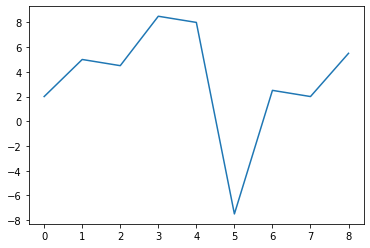

In [32]:
pattern = np.array([0.20, 0.50, 0.45, 0.85, 0.80, -0.75, 0.25, 0.20, 0.55])
plt.plot(np.arange(0,len(pattern),1),pattern)
plt.show() 

In [33]:
q_symbols, equations = get_q_filter_equations(pattern, verbose=True)
fun = system_function(q_symbols, equations) 

Unitary Energy Equation:
q0**2 + q1**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 - 1
Vanishing Moments Equations:
q1 + q2 + q3 + q4 + q5 + q6 + q7
q1 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7
Orthogonality Equations:
q0*q2 + q1*q3 + q2*q4 + q3*q5 + q4*q6 + q5*q7
q0*q4 + q1*q5 + q2*q6 + q3*q7
q0*q6 + q1*q7
Matching Condition Equations:
2.0*q0 + 5.0*q1 + 4.5*q2 + 8.5*q3 + 8.0*q4 - 7.5*q5 + 2.5*q6 + 2.0*q7
5.0*q0 + 4.5*q1 + 8.5*q2 + 8.0*q3 - 7.5*q4 + 2.5*q5 + 2.0*q6 + 5.5*q7


In [34]:
from scipy.optimize import root

In [35]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='hybr')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

    fjac: array([[-2.25862987e-01, -1.57470388e-10, -5.76630528e-10,
         3.55633764e-03, -4.63398172e-02,  1.50525259e-03,
        -3.61381185e-01, -9.03452964e-01],
       [ 5.51583783e-01, -2.47692171e-01, -2.47692170e-01,
        -6.55112204e-02, -2.30073042e-02,  1.02532724e-01,
        -7.30462111e-01,  1.55382096e-01],
       [ 1.71658877e-01, -1.85045679e-01, -6.93124667e-01,
        -3.74789691e-01,  3.22309619e-01, -1.18075406e-01,
         3.88251950e-01, -2.16419365e-01],
       [ 5.28213111e-01, -2.68168234e-01,  4.64162050e-01,
        -3.10804485e-01, -3.03433319e-01,  2.39429057e-01,
         3.48808506e-01, -2.56837391e-01],
       [-5.34310949e-01, -2.95488534e-01, -1.17732604e-01,
        -5.70762567e-01, -4.41439850e-01,  1.83864644e-01,
        -1.28679771e-01,  2.05751381e-01],
       [-1.00312454e-02,  2.09887717e-01,  4.19154783e-01,
        -6.08270785e-01,  4.98421769e-01, -3.33798476e-01,
        -2.16028168e-01,  6.04035444e-02],
       [ 2.01730278e-01,

In [36]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='lm')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

   cov_x: array([[ 1.34570417,  0.78964747, -0.85358107, -0.47201237, -0.09895051,
        -0.0640565 ,  0.79503359, -0.24563049],
       [ 0.78964747,  1.49597842, -0.629545  , -0.43670013,  0.06698963,
         0.40792899,  0.45596385, -0.5874659 ],
       [-0.85358107, -0.629545  ,  1.27032913, -0.24071173,  0.231161  ,
        -0.04676176, -0.57713462,  0.21928177],
       [-0.47201237, -0.43670013, -0.24071173,  0.78425091, -0.07697353,
         0.14353848, -0.22543773, -0.0662485 ],
       [-0.09895051,  0.06698963,  0.231161  , -0.07697353,  0.15695701,
         0.13806425, -0.32509802,  0.04792019],
       [-0.0640565 ,  0.40792899, -0.04676176,  0.14353848,  0.13806425,
         0.40248134, -0.14281673, -0.35536576],
       [ 0.79503359,  0.45596385, -0.57713462, -0.22543773, -0.32509802,
        -0.14281673,  1.49636901, -0.79190915],
       [-0.24563049, -0.5874659 ,  0.21928177, -0.0662485 ,  0.04792019,
        -0.35536576, -0.79190915,  0.97627496]])
    fjac: array([[-1.

In [37]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='broyden1')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([ 1.54108039e-06, -9.09046585e-08, -1.71281754e-07,  1.18809590e-06,
        9.43927735e-08,  5.24092792e-08, -5.50789215e-08,  4.24055310e-08])
 message: 'A solution was found at the specified tolerance.'
     nit: 48
  status: 1
 success: True
       x: array([ 0.07245559, -0.14279613, -0.50013425,  0.69941301,  0.06123944,
        0.33979494, -0.30351265, -0.15400445])
Absolute Error: 0.00000323564920525994


In [38]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='broyden2')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([ 3.54409500e-06,  1.28151158e-06, -3.64964093e-08, -1.44727640e-06,
       -1.39272988e-07,  9.82710259e-08,  1.72359561e-06, -3.16649708e-06])
 message: 'A solution was found at the specified tolerance.'
     nit: 88
  status: 1
 success: True
       x: array([ 0.28522474,  0.47490577, -0.77538209,  0.25692701, -0.09425448,
        0.12404583,  0.03444863, -0.02068937])
Absolute Error: 0.0000114370160981556


In [39]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='anderson')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([5.43970206e-07, 4.75453110e-07, 1.02873432e-06, 1.12855653e-07,
       4.74688429e-07, 5.69488859e-07, 4.59355900e-07, 2.98584571e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 205
  status: 1
 success: True
       x: array([-0.07245401,  0.14279872,  0.50013147, -0.69941303, -0.06124025,
       -0.33979487,  0.30351521,  0.15400322])
Absolute Error: 0.00000396313104772073


In [40]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='linearmixing')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([1.72722910e+14, 1.63639866e+06, 6.70038901e+06, 1.72941296e+11,
       3.37416770e+13, 2.04084939e+10, 4.50145226e+07, 3.90063473e+07])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 900
  status: 2
 success: False
       x: array([ 1.28587004e+07, -1.15931671e+03, -4.39859426e+03, -5.64010944e+05,
        2.62388452e+06, -4.16923097e+05,  1.58690235e+03, -2.58081143e+03])
Absolute Error: 206658028947781


In [42]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='krylov')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([-1.00000000e+00, -1.47840282e-37, -5.17494338e-37, -2.77849224e-48,
        2.48911439e-48, -2.23590082e-48, -8.24636744e-37,  2.75131806e-37])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 900
  status: 2
 success: False
       x: array([-2.11585819e-24, -1.63785127e-25,  7.25598162e-25,  1.22858178e-30,
       -7.53825205e-25, -7.26088026e-25,  1.06836670e-24, -1.50267737e-25])
Absolute Error: 1.00000000000000


## Pattern 3

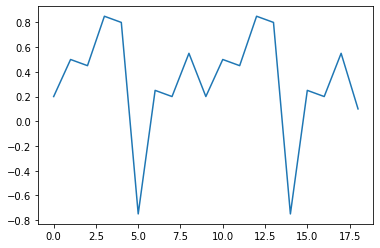

In [15]:
pattern = np.array(2*[0.20, 0.50, 0.45, 0.85, 0.80, -0.75, 0.25, 0.20, 0.55] + [0.10])
plt.plot(np.arange(0,len(pattern),1),pattern)
plt.show() 

In [16]:
q_symbols, equations = get_q_filter_equations(pattern, verbose=True)
fun = system_function(q_symbols, equations) 

Unitary Energy Equation:
q0**2 + q1**2 + q10**2 + q11**2 + q12**2 + q13**2 + q14**2 + q15**2 + q16**2 + q17**2 + q2**2 + q3**2 + q4**2 + q5**2 + q6**2 + q7**2 + q8**2 + q9**2 - 1
Vanishing Moments Equations:
q1 + q10 + q11 + q12 + q13 + q14 + q15 + q16 + q17 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9
q1 + 10*q10 + 11*q11 + 12*q12 + 13*q13 + 14*q14 + 15*q15 + 16*q16 + 17*q17 + 2*q2 + 3*q3 + 4*q4 + 5*q5 + 6*q6 + 7*q7 + 8*q8 + 9*q9
q1 + 100*q10 + 121*q11 + 144*q12 + 169*q13 + 196*q14 + 225*q15 + 256*q16 + 289*q17 + 4*q2 + 9*q3 + 16*q4 + 25*q5 + 36*q6 + 49*q7 + 64*q8 + 81*q9
q1 + 1000*q10 + 1331*q11 + 1728*q12 + 2197*q13 + 2744*q14 + 3375*q15 + 4096*q16 + 4913*q17 + 8*q2 + 27*q3 + 64*q4 + 125*q5 + 216*q6 + 343*q7 + 512*q8 + 729*q9
q1 + 10000*q10 + 14641*q11 + 20736*q12 + 28561*q13 + 38416*q14 + 50625*q15 + 65536*q16 + 83521*q17 + 16*q2 + 81*q3 + 256*q4 + 625*q5 + 1296*q6 + 2401*q7 + 4096*q8 + 6561*q9
q1 + 100000*q10 + 161051*q11 + 248832*q12 + 371293*q13 + 537824*q14 + 759375*q15 + 1048576*q1

In [17]:
from scipy.optimize import root

In [18]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='hybr')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

    fjac: array([[-9.01112941e-01,  5.43159877e-20,  3.08372932e-19,
         1.59665711e-18,  4.59430671e-18, -6.77626358e-17,
        -2.02789174e-15, -3.78308496e-14, -1.52287335e-01,
        -1.50975618e-01,  6.02741006e-02, -5.72577103e-02,
         9.58105948e-05, -1.35745096e-04, -1.53975323e-04,
        -1.25754868e-04, -1.36507632e-01, -3.41269080e-01],
       [ 6.46751125e-02, -3.62419875e-01, -3.62419875e-01,
        -3.62419875e-01, -3.62419875e-01, -3.62419875e-01,
        -3.62419875e-01, -3.62419875e-01,  1.45036622e-01,
        -2.55369432e-02,  2.40227778e-02,  1.08229789e-02,
        -1.92970664e-03,  9.67254524e-04,  9.86691400e-05,
        -3.58167545e-05, -1.76450509e-01, -1.51190372e-01],
       [ 4.57308035e-02, -2.71657607e-01, -2.54352631e-01,
        -2.19742680e-01, -1.50522779e-01, -1.20829755e-02,
         2.64796631e-01,  8.18555844e-01,  1.28599699e-01,
        -2.41606640e-02,  2.15122671e-02,  7.76541401e-03,
        -1.53369969e-03,  7.73067461e-04,  7

In [19]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='lm')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

   cov_x: array([[ 1.04452149e+02,  4.33990314e+01, -6.02417550e+01,
         1.71922032e+01, -1.94242829e+01,  2.23193313e+01,
         2.39200767e+01, -2.18337730e+00, -3.48807931e+01,
         2.66673824e+00,  3.19783192e+01, -2.99868549e+01,
        -1.46615647e+01,  3.68557606e+01,  1.62086546e+00,
        -1.91891632e+01,  3.20763614e+00,  1.91300269e+00],
       [ 4.37242304e+01,  2.07537046e+01, -2.56335408e+01,
         4.40265354e+00, -8.06640105e+00,  1.10992541e+01,
         1.14743460e+01, -1.84084815e+00, -1.58403931e+01,
         2.03478663e+00,  1.22121790e+01, -1.33222853e+01,
        -3.40224212e+00,  1.53507438e+01, -1.15262231e+00,
        -7.44189530e+00,  1.57146358e+00,  7.10307947e-01],
       [-5.95958266e+01, -2.52318882e+01,  3.54907867e+01,
        -9.16538918e+00,  1.02546053e+01, -1.36655587e+01,
        -1.41498127e+01,  1.57542493e+00,  2.20529921e+01,
        -1.35016783e+00, -1.96676959e+01,  1.66509818e+01,
         7.78524122e+00, -2.06084586e+01,  4

In [20]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='broyden1')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([ 5.22964863e+22, -1.61381264e+08,  3.97277108e+07, -2.49576272e+09,
       -3.62047883e+10, -5.46720333e+11, -8.37677471e+12, -1.29308893e+14,
       -2.17902424e+22,  8.02116251e+21,  7.53213575e+21, -3.55356238e+21,
        9.50536438e+21, -3.46416495e+21,  2.90984730e+21, -4.55687155e+20,
       -4.76961043e+07,  1.69671295e+07])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 1900
  status: 2
 success: False
       x: array([ 5.77807404e+09, -5.04053321e+08, -1.97155788e+10,  3.94947521e+10,
        2.85336708e+10, -4.65067040e+10, -1.06832980e+11,  9.28341251e+10,
        5.34803449e+10,  4.36500064e+10, -1.01749404e+11, -9.20950518e+08,
       -1.58165601e+09, -2.47245411e+10,  6.38240321e+10,  3.05937855e+10,
       -7.65517881e+10,  2.65155583e+10])
Absolute Error: 1.09528653242138E+23


In [21]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='broyden2')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([ 1.16251337e+00,  6.54536156e-01,  1.25472751e-01, -5.89581079e+01,
       -1.33477683e+03, -2.43515940e+04, -4.19629849e+05, -7.10408040e+06,
        1.90436598e-02, -4.16805885e-02, -9.52315418e-01, -5.67647647e-06,
       -6.24233301e-02, -4.64164035e-02, -1.56684849e-03,  1.10483922e-01,
       -3.00691661e-01, -5.11994226e-01])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 1900
  status: 2
 success: False
       x: array([-1.19417117e+00,  1.98079447e-04,  1.11838952e-03,  6.32534529e-03,
        3.52986023e-02,  1.86532510e-01,  7.97462877e-01, -4.82179520e-02,
        3.84937635e-06, -8.43952179e-06, -1.92805022e-04, -1.14662988e-09,
       -1.27053831e-05, -9.39776919e-06, -3.17271879e-07,  9.37326173e-08,
       -9.25577181e-02, -2.31404254e-01])
Absolute Error: 7549459.56938236


In [22]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='anderson')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

/home/adrian/.local/lib/python3.10/site-packages/scipy/optimize/_nonlin.py:1072: LinAlgWarning: Ill-conditioned matrix (rcond=7.6991e-33): result may not be accurate.
  gamma = solve(self.a, df_f)
/home/adrian/.local/lib/python3.10/site-packages/scipy/optimize/_nonlin.py:1072: LinAlgWarning: Ill-conditioned matrix (rcond=7.4628e-34): result may not be accurate.
  gamma = solve(self.a, df_f)
/home/adrian/.local/lib/python3.10/site-packages/scipy/optimize/_nonlin.py:1072: LinAlgWarning: Ill-conditioned matrix (rcond=5.23019e-34): result may not be accurate.
  gamma = solve(self.a, df_f)
/home/adrian/.local/lib/python3.10/site-packages/scipy/optimize/_nonlin.py:1072: LinAlgWarning: Ill-conditioned matrix (rcond=4.69048e-34): result may not be accurate.
  gamma = solve(self.a, df_f)
/home/adrian/.local/lib/python3.10/site-packages/scipy/optimize/_nonlin.py:1072: LinAlgWarning: Ill-conditioned matrix (rcond=1.07201e-19): result may not be accurate.
  gamma = solve(self.a, df_f)
/home/adrian

     fun: array([ 8.88289129e+18, -4.73586709e+09, -5.61636637e+10, -6.71230711e+11,
       -8.08569939e+12, -9.80882331e+13, -1.19707558e+15, -1.46834489e+16,
        3.95137779e+17,  1.01235381e+18,  1.67150743e+16, -7.59834474e+16,
       -5.27854714e+15,  1.66444317e+15, -3.25997341e+10,  7.30112153e+09,
       -3.34270880e+09, -1.72780336e+09])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 1900
  status: 2
 success: False
       x: array([-7.48105196e+05,  1.04804763e+05,  5.49987072e+05,  2.72881981e+06,
        1.18184679e+07,  3.50145996e+07, -1.49384009e+07, -4.63094865e+05,
        4.22311182e+07, -8.77608191e+08,  4.23006639e+08, -6.38296043e+08,
       -2.40925887e+09, -1.31088881e+09, -3.46939283e+04,  2.06754646e+05,
       -1.34969394e+04, -2.66782627e+04])
Absolute Error: 1.04060118716431E+19


In [23]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='linearmixing')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([ 3.73055573e+12, -2.05027838e+06, -1.42219473e+07, -9.87901760e+07,
       -6.87030767e+08, -4.78261286e+09, -3.33208114e+10, -2.32314340e+11,
        1.32705494e+10,  4.73335234e+07,  2.81718122e+05, -4.21756227e+04,
        7.21503096e+05,  2.56665440e+03,  9.15500070e+00,  2.05718372e-01,
       -4.09550203e+05, -1.08483574e+06])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 1900
  status: 2
 success: False
       x: array([-9.83124998e-01, -8.75000218e-02, -1.46250015e+00, -2.44625011e+01,
       -4.09462507e+02, -6.85846255e+03, -1.14955463e+05, -1.92802846e+06,
        7.21602248e-12,  3.83724650e-12,  1.07008417e-09, -2.28902891e-17,
        2.62506330e-09,  9.33826990e-12,  3.33084693e-14,  2.18750000e-02,
       -1.76875004e-01, -3.63750012e-01])
Absolute Error: 4015096009458.36


In [24]:
sol = root(fun,[0 for _ in range(len(q_symbols))], method='krylov')
print(sol)
compute_abs_error(q_symbols,sol.x, equations)

     fun: array([-1.00000000e+00,  8.29159736e-38,  6.46579290e-37,  5.75729353e-36,
        5.97341804e-35,  6.57857458e-34,  7.79131024e-33,  9.79320453e-32,
       -5.28492280e-47,  3.92611859e-47,  2.60727635e-47, -2.63261335e-47,
        3.15340364e-47, -1.35221160e-48,  4.45690628e-48,  1.29282624e-48,
       -2.36794191e-38,  2.80423569e-38])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 1900
  status: 2
 success: False
       x: array([-7.33457166e-24, -1.13549255e-25, -3.32198930e-25,  1.96626045e-24,
       -1.84960851e-24,  7.19910310e-25, -3.90328792e-24,  3.39124403e-24,
        4.86001263e-24, -4.16229286e-24, -3.98798353e-24,  3.38580063e-24,
        2.85466893e-25,  2.86702025e-25, -5.70449306e-25,  8.81906861e-26,
       -1.78026647e-25,  1.13809281e-25])
Absolute Error: 1.00000000000000
